In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
drug=pd.read_csv("Downloads/drugsCom (1).csv")
drug

,unique id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,"September 19, 2015",79


In [8]:
drug.columns

Index(['unique id', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [9]:
drug.shape

(161297, 7)

In [10]:
drug.describe()

,unique id,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [11]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   unique id    161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [12]:
drug.dtypes

unique id       int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [13]:
drug.isnull().any()

unique id      False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [14]:
drug['condition'].nunique()

884

In [15]:
drug.head(10)

,unique id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,"November 27, 2016",37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,"March 7, 2017",5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,"March 14, 2015",32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,"August 9, 2016",11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1


In [16]:
condition1=['Depression','High Blood Pressure','Diabetes, Type 2']
drug1=drug[drug['condition'].isin(condition1)]
drug1

,unique id,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,"July 15, 2009",39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,"July 18, 2009",25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,"October 23, 2015",47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,"July 17, 2016",33


In [17]:
drug1['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

In [18]:
drug1.loc[drug1['rating']==1,:]['drugName'].value_counts().head(10)

Lisinopril      74
Venlafaxine     73
Vortioxetine    62
Cymbalta        53
Bupropion       51
Duloxetine      49
Effexor         48
Trulicity       47
Vilazodone      45
Sertraline      44
Name: drugName, dtype: int64

In [19]:
print(drug1['drugName'].nunique())
print(drug1['condition'].nunique())

334
3


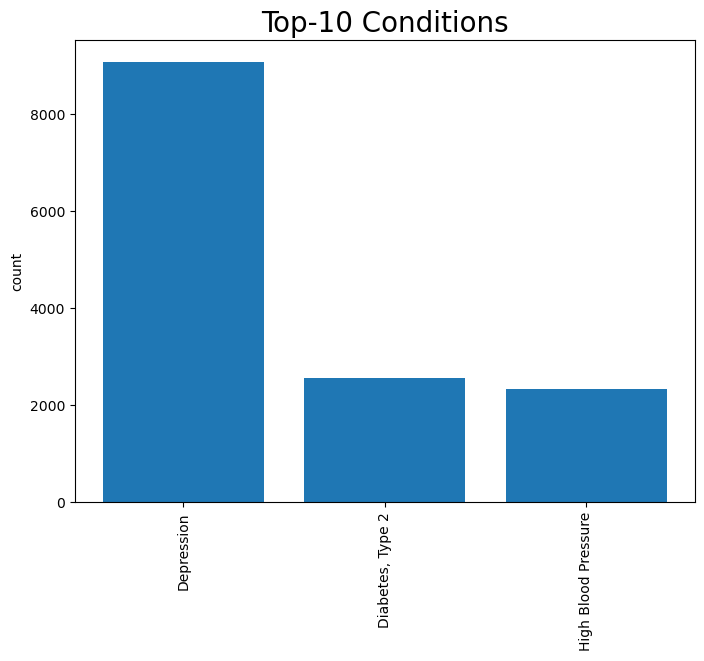

In [20]:
plt.figure(figsize=(8,6))
conditions=drug1['condition'].value_counts(ascending=False).head(10)
plt.bar(conditions.index,conditions.values)
plt.title('Top-10 Conditions',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

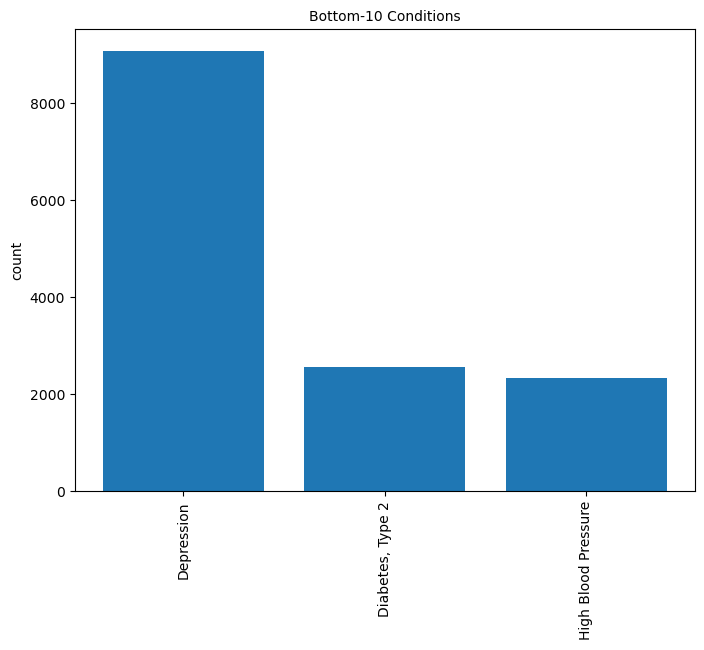

In [21]:
plt.figure(figsize=(8,6))
conditions_bottom=drug1['condition'].value_counts(ascending=False).tail(10)
plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-10 Conditions',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

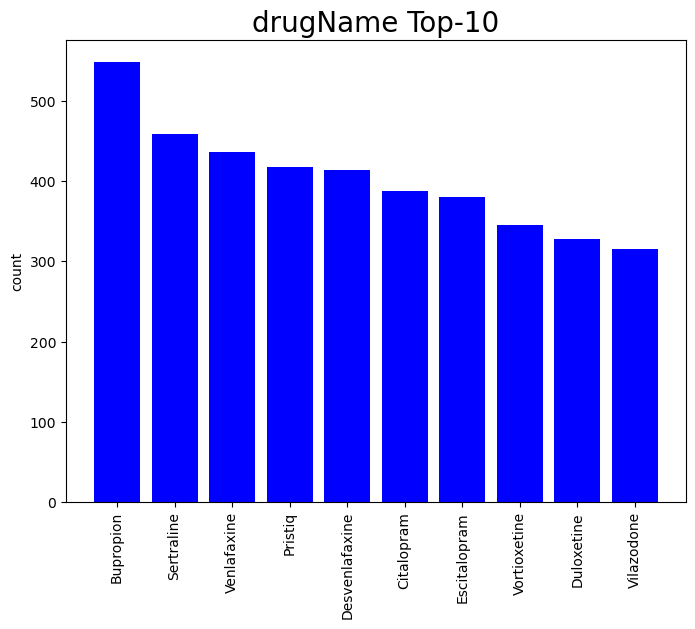

In [22]:
plt.figure(figsize=(8,6))
drugName_top=drug1['drugName'].value_counts(ascending=False).head(10)
plt.bar(drugName_top.index,drugName_top.values,color='blue')                 
plt.title('drugName Top-10',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

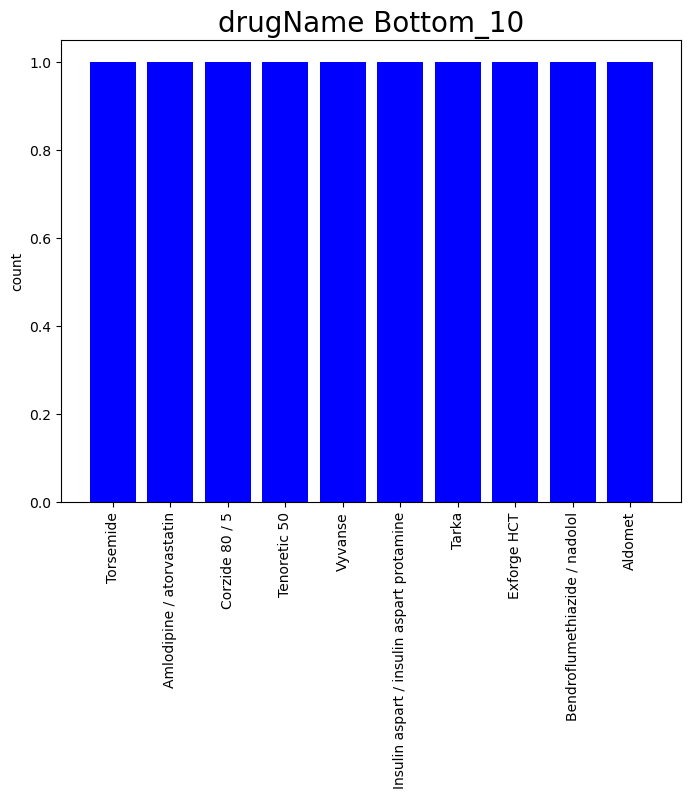

In [23]:
plt.figure(figsize=(8,6))
drugName_bottom=drug1['drugName'].value_counts(ascending=False).tail(10)
plt.bar(drugName_bottom.index,drugName_bottom.values,color='blue')
plt.title('drugName Bottom_10',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [24]:
ratings_ = drug1['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/drug.shape[0])
print(ratings_)

   rating  counts   percent
0      10    3763  2.332963
1       9    2468  1.530097
2       1    1802  1.117194
3       8    1795  1.112854
4       7     995  0.616874
5       5     756  0.468701
6       6     680  0.421583
7       2     645  0.399883
8       3     582  0.360825
9       4     458  0.283948


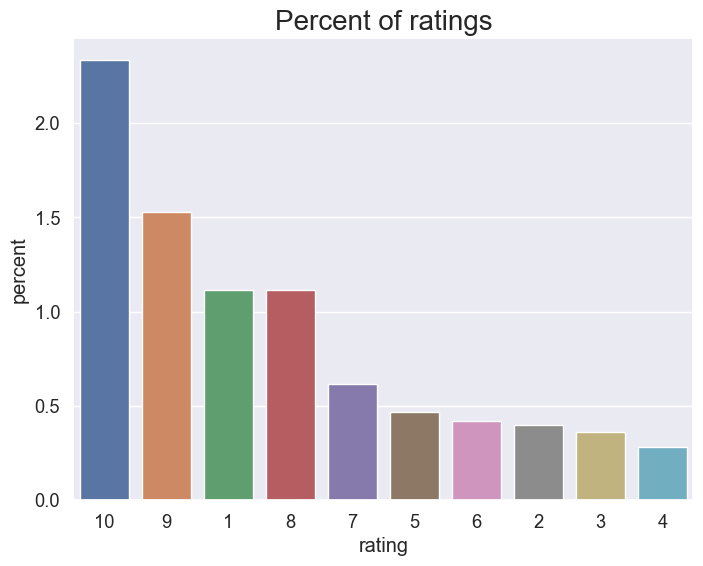

In [25]:
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize']=[8,6]

sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Percent of ratings',fontsize=20)
plt.show()

C:\Users\golla\AppData\Local\Temp\ipykernel_12464\1250850011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drug1['usefulCount'])


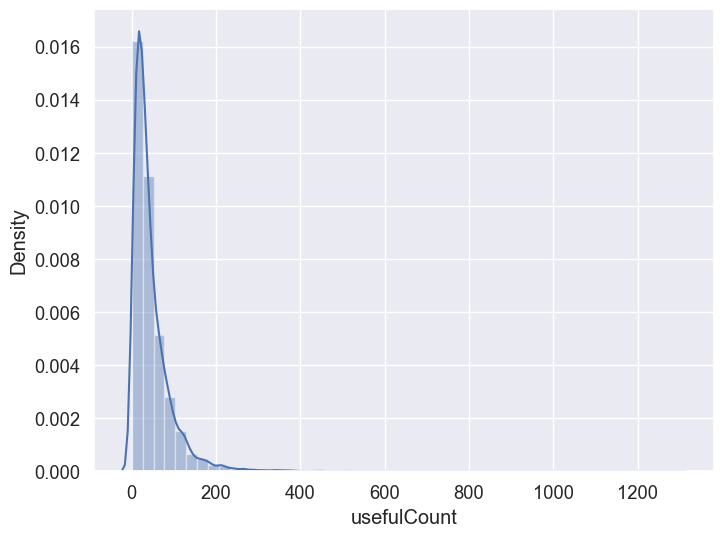

In [26]:
#Plot a distplot of usefulCount
sns.distplot(drug1['usefulCount'])
plt.show()

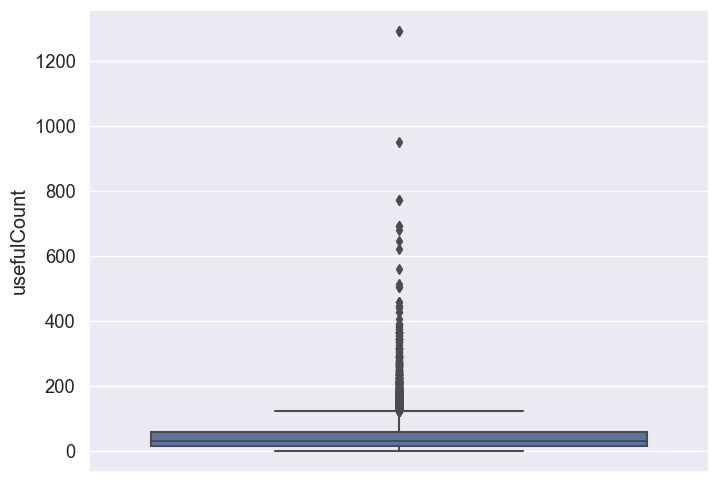

In [27]:
#check the descriptive summary
sns.boxplot(y = drug1['usefulCount'])
plt.show()

In [28]:
#check the number of drugs/condition
drug1.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(30)

condition
High Blood Pressure    140
Depression             105
Diabetes, Type 2        89
Name: drugName, dtype: int64

In [29]:
drug1.shape[0]

13944

## EDA after removing noise

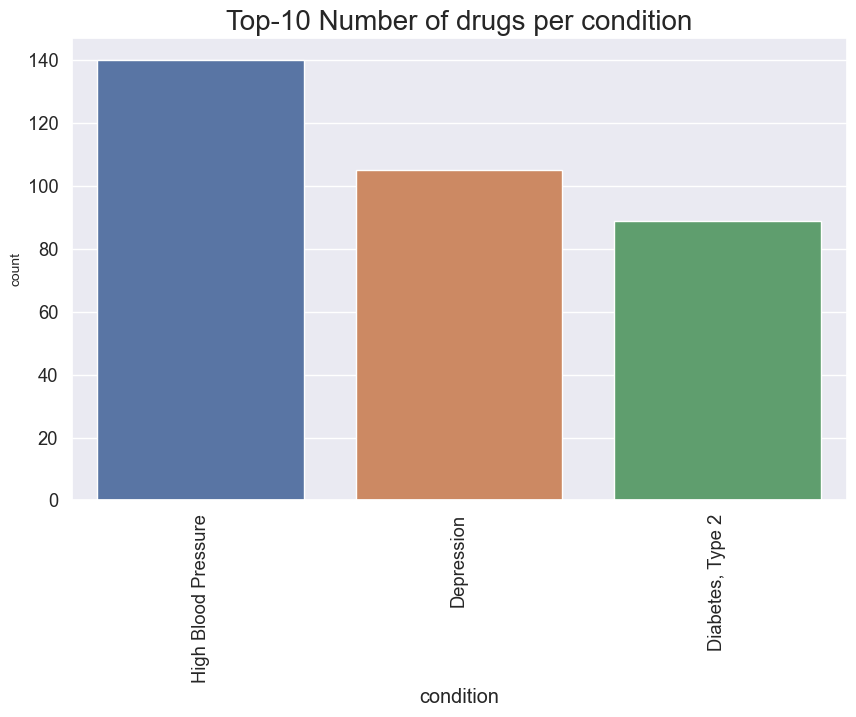

In [30]:
#lets check the number of drugs present in our dataset condition wise
conditions_data = drug1.groupby('condition')['drugName'].nunique().sort_values(ascending=False)


# Setting the Parameter
condition_data_top_10 = conditions_data.head(10)
sns.set(font_scale = 1.2)
plt.rcParams['figure.figsize'] = [10, 6]
sns.barplot(x = condition_data_top_10.index, y = condition_data_top_10.values)
plt.title('Top-10 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

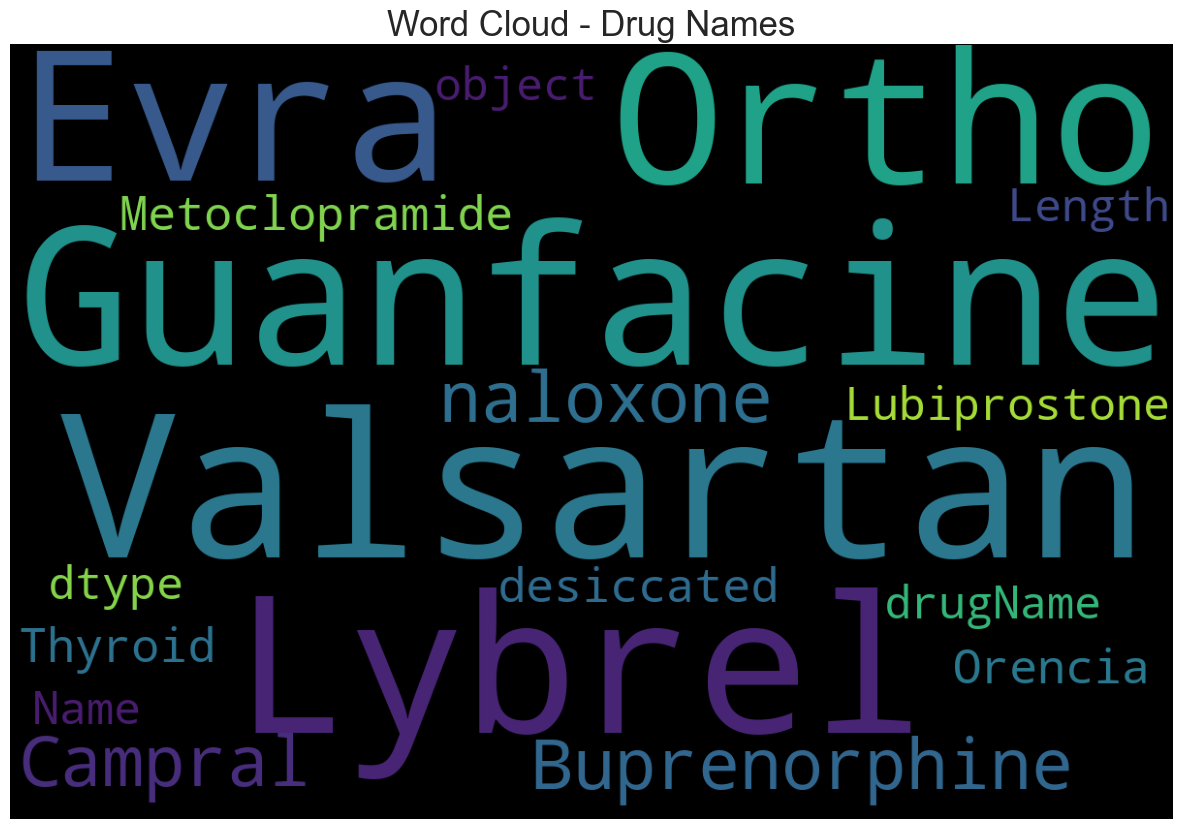

In [31]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(drug['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

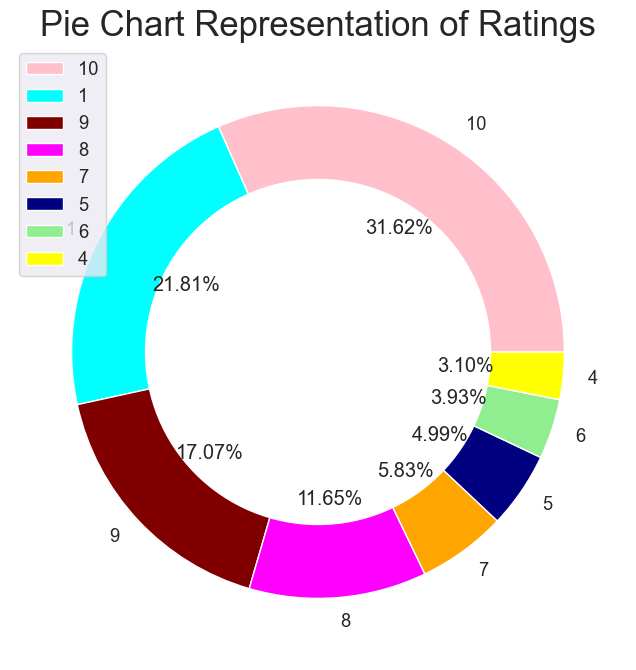

In [32]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

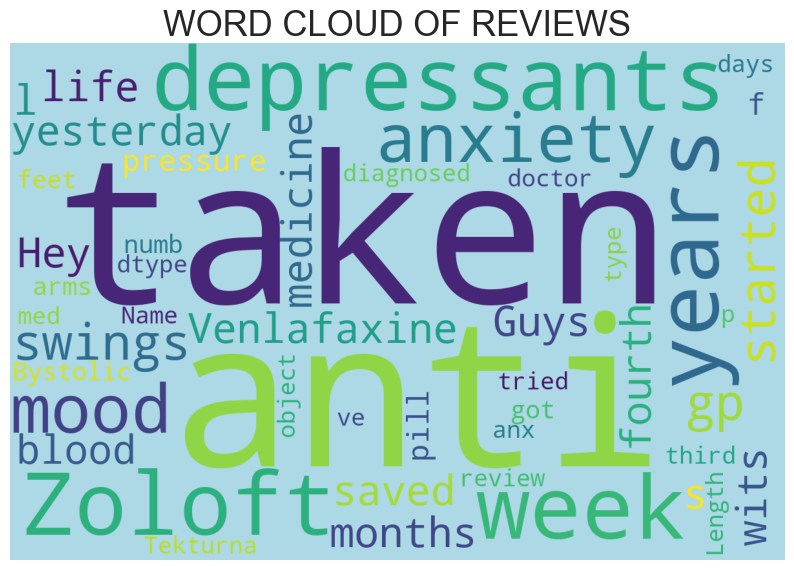

In [33]:
# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(drug1['review']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [34]:
# feature engineering 
# let's make a new column review sentiment 

drug1.loc[(drug1['rating'] >= 5), 'Review_Sentiment'] = 1
drug1.loc[(drug1['rating'] < 5), 'Review_Sentiment'] = 0

drug1['Review_Sentiment'].value_counts()

C:\Users\golla\AppData\Local\Temp\ipykernel_12464\2099316043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug1.loc[(drug1['rating'] >= 5), 'Review_Sentiment'] = 1


1.0    10457
0.0     3487
Name: Review_Sentiment, dtype: int64

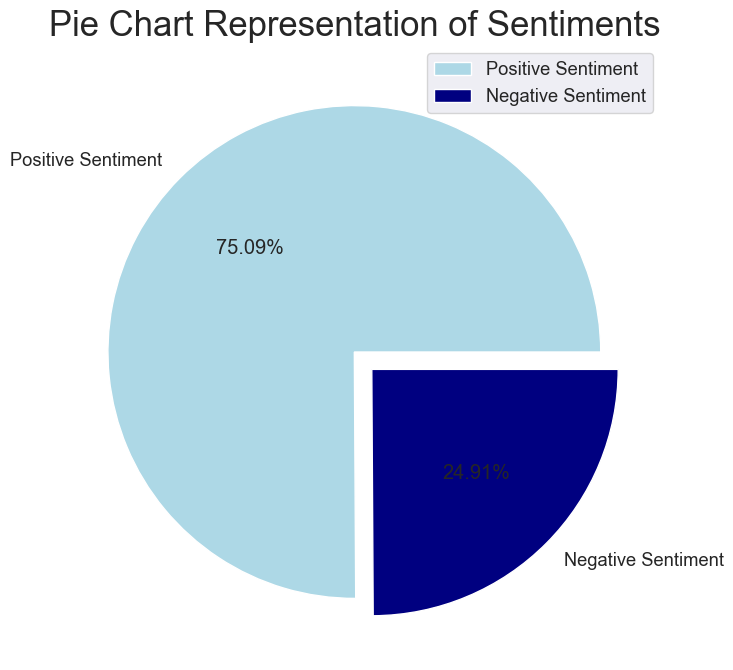

In [35]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

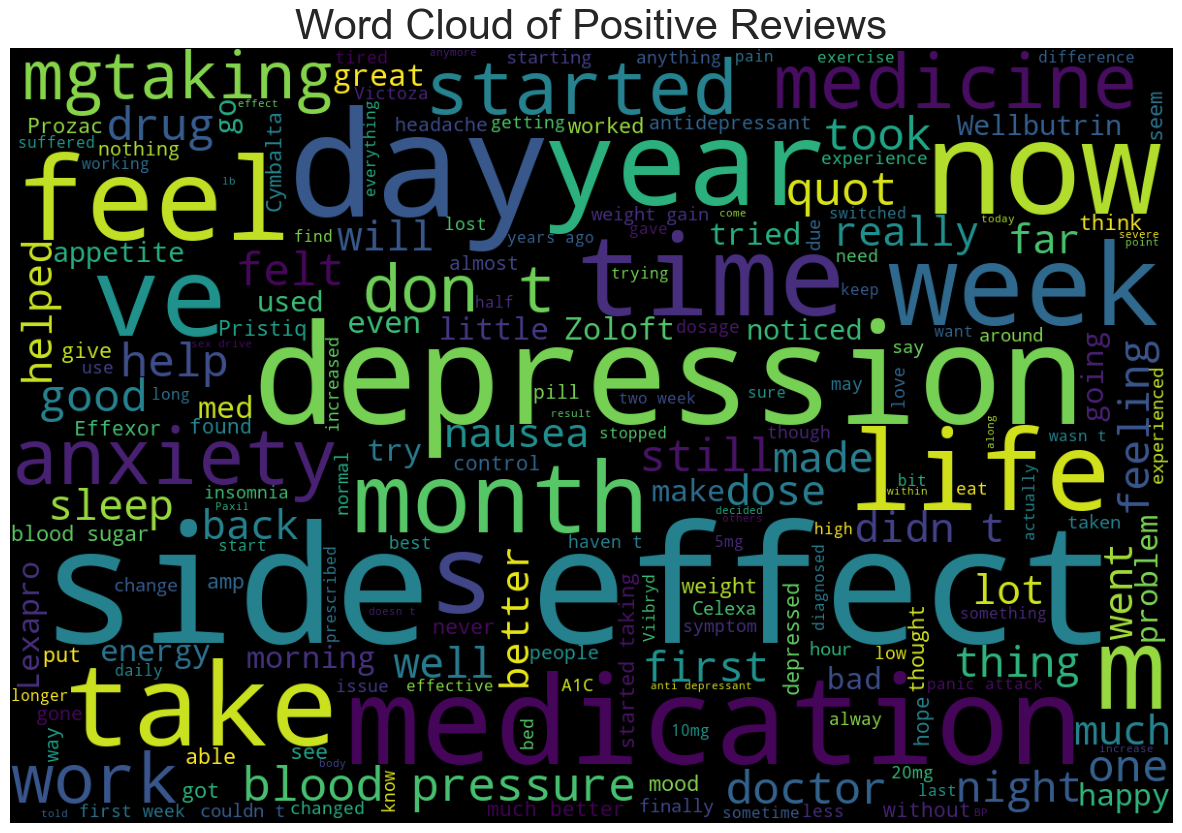

In [36]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in drug1['review'][drug1['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

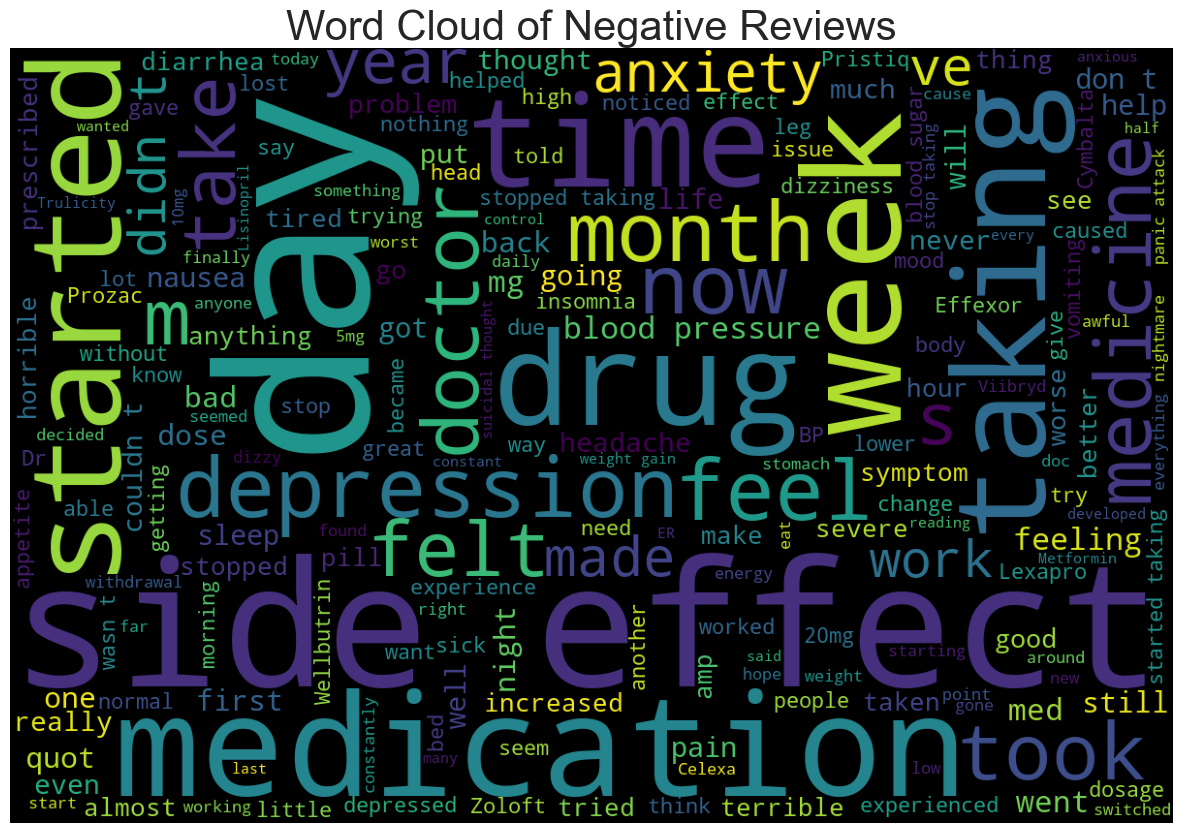

In [37]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in drug1['review'][drug1['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [38]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [39]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
X = drug1.drop(['drugName','rating','date','usefulCount'],axis=1)

In [41]:
X.head(2)

,unique id,condition,review,Review_Sentiment
11,75612,Depression,"""I have taken anti-depressants for years, with...",1.0
31,96233,Depression,"""1 week on Zoloft for anxiety and mood swings....",1.0


In [42]:
from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer

# porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [43]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


## DATA PREPROCESSING

In [44]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [45]:
drug1['review_clean'] = review_clean(drug1['review'])

C:\Users\golla\AppData\Local\Temp\ipykernel_12464\3584754075.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
C:\Users\golla\AppData\Local\Temp\ipykernel_12464\3584754075.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
C:\Users\golla\AppData\Local\Temp\ipykernel_12464\3584754075.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
C:\Users\golla\AppData\Local\Temp\ipykernel_12464\3584754075.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
C:\Users\golla\AppData\Local\Temp\ipykernel_12464\3584754075.py:21: FutureWarning: The default val

In [46]:
drug1.head(2)

,unique id,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54,1.0,i have taken anti depressants for years with s...
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3,1.0,1 week on zoloft for anxiety and mood swings i...


In [47]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
drug1['review_clean'] = drug1['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


In [48]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
drug1['review_clean'] = drug1['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))


In [49]:
drug1.head()

,unique id,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54,1.0,taken anti depress year improv most moder seve...
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3,1.0,1 week zoloft anxieti mood swing take 50mg mor...
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3,0.0,gp start venlafaxin yesterday help depress cha...
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24,1.0,hey guy 4 month sinc last post want give month...
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166,1.0,medicin save life wit end anti depress readi g...


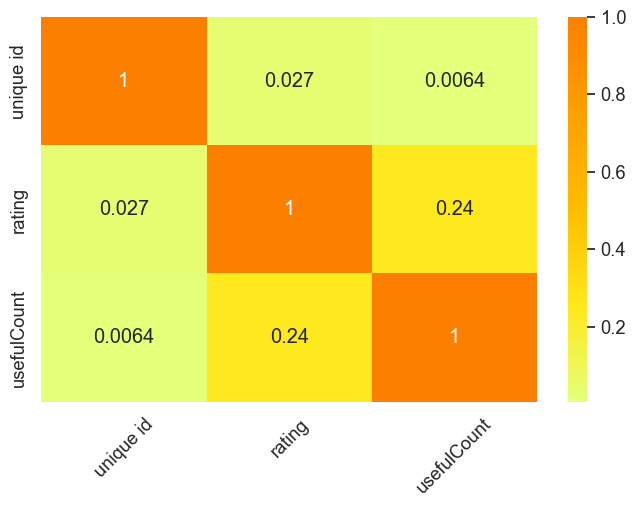

In [50]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [8,5]
sns.set(font_scale = 1.2)
corr = drug1.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

#### Correlation Heatmap is plotted using seaborn which contains all the new features engineered and the old features.

In [51]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [52]:
drug1['sentiment'] = sentiment(drug1['review'])
drug1['sentiment_clean'] = sentiment(drug1['review_clean'])

In [53]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
drug1['review_clean_ss'] = review_clean(drug1['review'])
drug1['sentiment_clean_ss'] = sentiment(drug1['review_clean_ss'])

In [54]:
drug1 = drug1.dropna(how="any", axis=0)

In [55]:
#Word count in each review
drug1['count_word']=drug1["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
drug1['count_unique_word']=drug1["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
drug1['count_letters']=drug1["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
drug1["count_punctuations"] = drug1["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
drug1["count_words_upper"] = drug1["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
drug1["count_words_title"] = drug1["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
drug1["count_stopwords"] = drug1["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
drug1["mean_word_len"] = drug1["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [56]:
drug1.columns

Index(['unique id', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'review_clean', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

In [57]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    drug1[feature] = label_encoder_feat[feature].fit_transform(drug1[feature])

In [58]:
drug1.head()

,unique id,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean,sentiment,...,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
11,75612,173,0,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54,1.0,taken anti depress year improv most moder seve...,0.275000,...,i have taken anti depressants for years with s...,0.275000,81,63,440,15,5,10,35,4.444444
31,96233,275,0,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3,1.0,1 week zoloft anxieti mood swing take 50mg mor...,0.166667,...,1 week on zoloft for anxiety and mood swings i...,-0.055556,52,44,262,8,3,5,21,4.057692
44,121333,313,0,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3,0.0,gp start venlafaxin yesterday help depress cha...,-0.136508,...,my gp started me on venlafaxine yesterday to h...,-0.087546,142,94,702,15,0,2,63,3.950704
50,156544,89,1,"""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24,1.0,hey guy 4 month sinc last post want give month...,0.103571,...,hey guys its been 4 months since my last post ...,0.103571,147,96,729,24,13,23,75,3.965986
67,131909,95,0,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166,1.0,medicin save life wit end anti depress readi g...,0.168194,...,this medicine saved my life i was at my wits e...,0.168194,108,77,555,15,13,12,53,4.148148


In [59]:
drug1['condition'].unique()

array([0, 1, 2])

In [60]:
drug1['drugName'].unique()

array([173, 275, 313,  89,  95, 323,  28,  23,  82, 110,  52, 305, 184,
       186,  97, 202, 316, 302, 252, 180,  78, 103,  53, 102, 213, 332,
       249, 201, 325, 181, 317,  94, 333, 306, 278,  90, 265, 258, 294,
       189, 136,  69,  41, 280, 318,  99,  85, 296,  98, 169,  66, 320,
       260, 241, 311, 257,  84, 254, 175, 166,  79, 303, 182, 240,  58,
        80, 276, 271, 172, 164, 143,  55, 197,  48, 326, 179, 214, 138,
        19, 239, 157,  96,  21,  32, 324, 235, 165,  67, 261,   5,  46,
        49,  87, 168, 269,  77, 215,  15,   0,  17,  54,  65, 107, 167,
       177, 114, 272,  13, 299,  45, 112, 273, 233, 118, 234,  31, 282,
       209, 289,  81,  62, 274, 104, 330, 148,  64, 221, 162, 331, 236,
       268, 248,  71, 141,  35,   6, 115, 191, 244, 290, 225, 134, 210,
       158, 301, 232,  22, 116, 109, 117,  59,   3, 204, 267, 279, 307,
       251, 312, 217, 147,   4, 242, 190,  83, 122, 195,  33, 187, 129,
        26, 205, 145,  38, 140, 144, 329,  37, 298,  39, 111, 26

In [61]:
X = drug1.drop(['drugName','rating','date','usefulCount'],axis=1)


In [62]:
X.condition.value_counts()

0    9069
1    2554
2    2321
Name: condition, dtype: int64

In [63]:
X.head(2)

,unique id,condition,review,Review_Sentiment,review_clean,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
11,75612,0,"""I have taken anti-depressants for years, with...",1.0,taken anti depress year improv most moder seve...,0.275000,0.240972,i have taken anti depressants for years with s...,0.275000,81,63,440,15,5,10,35,4.444444
31,96233,0,"""1 week on Zoloft for anxiety and mood swings....",1.0,1 week zoloft anxieti mood swing take 50mg mor...,0.166667,0.166667,1 week on zoloft for anxiety and mood swings i...,-0.055556,52,44,262,8,3,5,21,4.057692


In [64]:
X=drug1['review']
y=drug1['condition']

In [65]:
X.head()

11    "I have taken anti-depressants for years, with...
31    "1 week on Zoloft for anxiety and mood swings....
44    "my gp started me on Venlafaxine yesterday to ...
50    "Hey Guys,  It&#039;s been 4 months since my l...
67    "This medicine saved my life. I was at my wits...
Name: review, dtype: object

In [66]:
y.head()

11    0
31    0
44    0
50    1
67    0
Name: condition, dtype: int32

In [67]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2, random_state=0)
features = drug1[['condition', 'usefulCount', 'sentiment',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = drug1['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (9760, 12)
The Test set size  (4184, 12)


In [68]:
X_train.head(2)

,condition,usefulCount,sentiment,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
133115,0,57,-0.077747,-0.077747,147,85,720,25,11,20,72,3.904762
10112,0,14,-0.105000,-0.105000,38,34,199,14,3,6,14,4.263158


In [69]:
X_test.head(2)

,condition,usefulCount,sentiment,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
98747,0,47,0.196611,0.196611,137,91,720,26,9,17,72,4.262774
42759,0,43,0.400000,0.400000,44,38,223,18,3,4,21,4.090909


In [70]:
y_train.head()

133115    1.0
10112     1.0
138373    1.0
40363     1.0
5406      0.0
Name: Review_Sentiment, dtype: float64

In [71]:
y_test.head()

98747     1.0
42759     0.0
152632    1.0
65985     1.0
87628     0.0
Name: Review_Sentiment, dtype: float64

## Bag of Words

In [72]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [73]:
count_train

<12x12 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [74]:
import itertools # confusion matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

## Naive Bayes Algorithm

In [75]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
Output: GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
y_pred_NB = classifier.predict(X_test)
y_pred_NB

array([1., 1., 1., ..., 1., 1., 1.])

In [77]:
cm_NB = confusion_matrix(y_test, y_pred_NB) 
cm_NB

array([[ 457,  618],
       [ 543, 2566]], dtype=int64)

Confusion matrix, without normalization


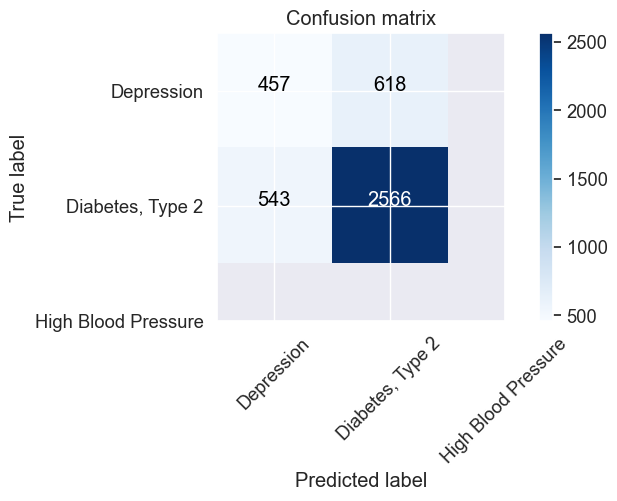

In [78]:
plot_confusion_matrix(cm_NB, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [79]:
TP_NB = 2566 #True Positives 
TN_NB = 457 #True Negatives 
FP_NB = 543 #False Positives 
FN_NB = 618 #False Negatives 

In [80]:
Accuracy_NB = (TP_NB + TN_NB) / (TP_NB + TN_NB + FP_NB + FN_NB) 
Accuracy_NB  

0.7225143403441683

In [81]:
Precision_NB = TP_NB / (TP_NB + FP_NB)
Precision_NB

0.8253457703441621

In [82]:
Recall_NB = TP_NB / (TP_NB + FN_NB)
Recall_NB

0.8059045226130653

In [83]:
F1_Score_NB = 2 * Precision_NB * Recall_NB / (Precision_NB + Recall_NB)
F1_Score_NB

0.8155092960432226

## Decision Tree

In [84]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [85]:
y_pred_DT = classifier.predict(X_test)
y_pred_DT

array([0., 0., 1., ..., 1., 1., 1.])

In [86]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[ 661,  414],
       [ 422, 2687]], dtype=int64)

Confusion matrix, without normalization


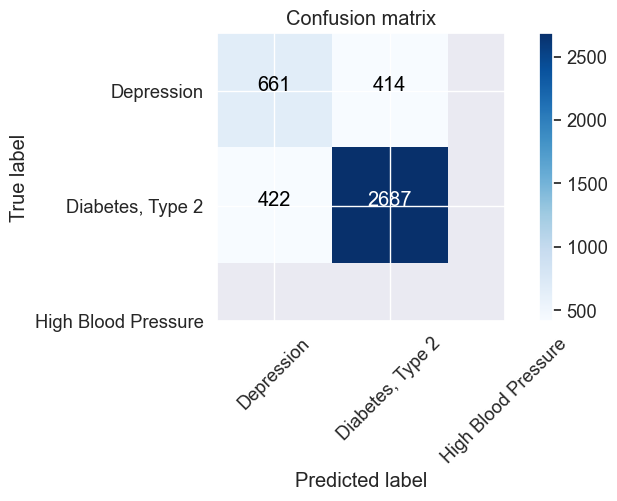

In [87]:
plot_confusion_matrix(cm_DT, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [88]:
TP_D = 2688 #True Positives 
TN_D = 666 #True Negatives 
FP_D = 421 #False Positives 
FN_D = 409 #False Negatives 

In [89]:
Accuracy_D = (TP_D + TN_D) / (TP_D + TN_D + FP_D + FN_D)
Accuracy_D

0.8016252390057361

In [90]:
Precision_D = TP_D / (TP_D + FP_D)
Precision_D

0.8645866838211643

In [91]:
Recall_D = TP_D / (TP_D + FN_D)
Recall_D

0.8679367129480142

In [92]:
F1_Score_D = 2 * Precision_D * Recall_D / (Precision_D + Recall_D)
F1_Score_D

0.8662584595552691

## Random Forest 

In [93]:
classifier_RA = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_RA.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [94]:
y_pred_RF = classifier_RA.predict(X_test)
y_pred_RF

array([1., 0., 1., ..., 1., 1., 1.])

In [95]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_RF

array([[ 594,  481],
       [ 146, 2963]], dtype=int64)

Confusion matrix, without normalization


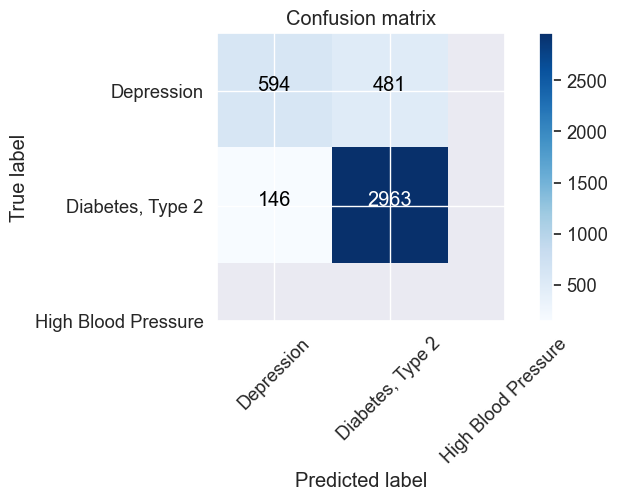

In [96]:
plot_confusion_matrix(cm_RF, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [97]:
TP_RF = 2967 #True Positives 
TN_RF = 592 #True Negatives 
FP_RF = 142 #False Positives 
FN_RF = 483 #False Negatives 

In [98]:
Accuracy_RF = (TP_RF + TN_RF) / (TP_RF + TN_RF + FP_RF + FN_RF)
Accuracy_RF

0.8506214149139579

In [99]:
Precision_RF = TP_RF / (TP_RF + FP_RF)
Precision_RF

0.9543261498874236

In [100]:
Recall_RF = TP_RF / (TP_RF + FN_RF)
Recall_RF

0.86

In [101]:
F1_Score_RF = 2 * Precision_RF * Recall_RF / (Precision_RF + Recall_RF)
F1_Score_RF

0.9047110840067083

## PassiveAggressiveClassifier 

In [102]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [103]:
pred = passive.predict(X_test)
pred

array([1., 1., 1., ..., 1., 1., 1.])

In [104]:
cm_PA = confusion_matrix(y_test, pred) 
cm_PA

array([[ 129,  946],
       [  94, 3015]], dtype=int64)

Confusion matrix, without normalization


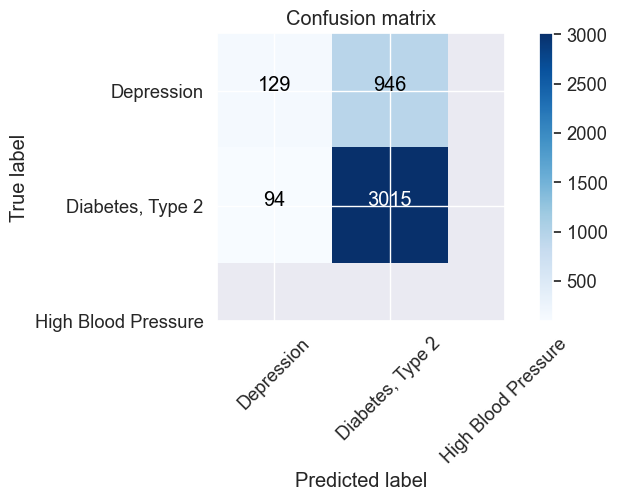

In [105]:
plot_confusion_matrix(cm_PA, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [106]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, pred)
score

0.751434034416826

In [107]:
TP_PA = 566 #True Positives 
TN_PA = 981 #True Negatives 
FP_PA = 2543 #False Positives 
FN_PA = 981 #False Negatives 

In [108]:
from sklearn.svm import SVC

In [109]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [110]:
from sklearn import metrics
score_svm = metrics.accuracy_score(y_test, pred)
score_svm

0.751434034416826

In [111]:
from sklearn import datasets, linear_model
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [112]:
y_pred = reg.predict(X_test)

In [113]:
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 74.02007648183556


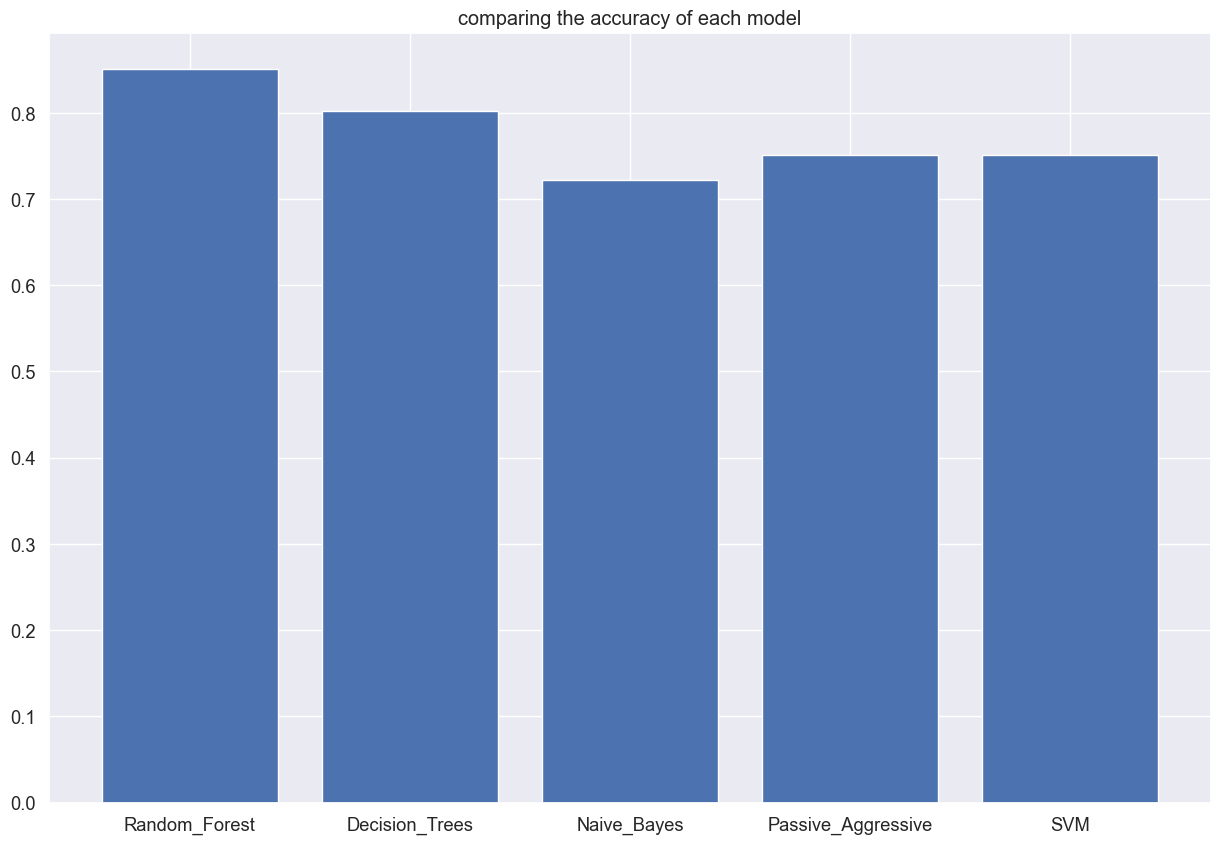

In [120]:
Accuracy = [Accuracy_RF, Accuracy_D, Accuracy_NB,score,score_svm,]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', 'Passive_Aggressive','SVM']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(15,10))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()